In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('C:/Users/KIIT/Downloads/housing_price_dataset.csv')


In [9]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.786
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1482617.729
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.583
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1198656.872
4999,65510.58180,5.992305,6.792336,4.07,46501.28380,1298950.480


In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [14]:
data={
    'X1' : df['Avg. Area Income'],
    'X2' : df['Avg. Area House Age'],
    'X3' : df['Avg. Area Number of Rooms'],
    'X4' : df['Avg. Area Number of Bedrooms'],
    'X5' : df['Area Population'],
    'Y' : df['Price']
}

In [15]:
df = pd.DataFrame(data)

In [17]:
df

,X1,X2,X3,X4,X5,Y
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [19]:
X=df[['X1','X2','X3','X4','X5']]
Y=df['Y']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [23]:
predictions = model.predict(X_test)

In [24]:
mse = mean_squared_error(Y_test, predictions)
r_squared = model.score(X_test, Y_test)

In [25]:
print(f"On the test data, the model's Mean Squared Error (MSE) is: {mse:.2f}")
print(f"The R-squared value for the model on the test data is: {r_squared:.2f}")
print(f"Model Coefficients (weights for X1, X2, X3): {model.coef_}")
print(f"Model Intercept (the predicted value when all inputs are zero): {model.intercept_}")

On the test data, the model's Mean Squared Error (MSE) is: 10089009299.50
The R-squared value for the model on the test data is: 0.92
Model Coefficients (weights for X1, X2, X3): [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]
Model Intercept (the predicted value when all inputs are zero): -2635072.90091678


In [30]:
new_sample = np.array([[16, 17, 18,19,20]]) 
new_prediction = model.predict(new_sample)
print(f"For the new sample input {new_sample[0]}, the model predicts a value of:{new_prediction[0]:.2f}")

For the new sample input [16 17 18 19 20], the model predicts a value of:2364508.51


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
print("Training set size:", X_train.shape, Y_train.shape)
print("Testing set size:", X_test.shape, Y_test.shape)

Training set size: (4000, 5) (4000,)
Testing set size: (1000, 5) (1000,)


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

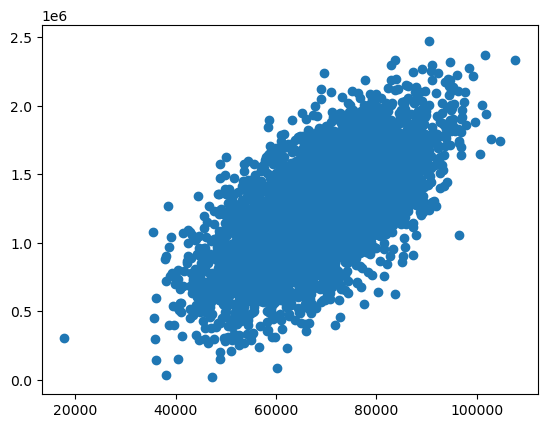

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df['X1'],df['Y'])

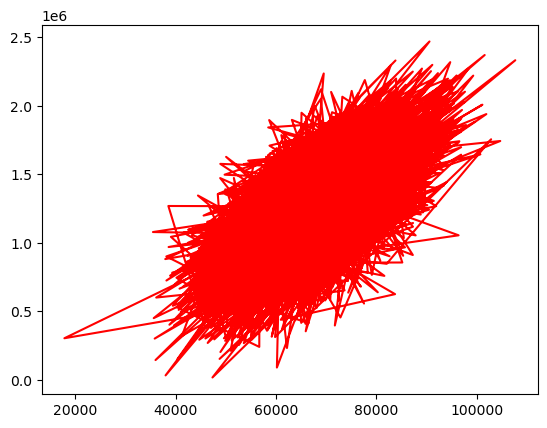

In [45]:
plt.plot(df['X1'],df['Y'], color='red')


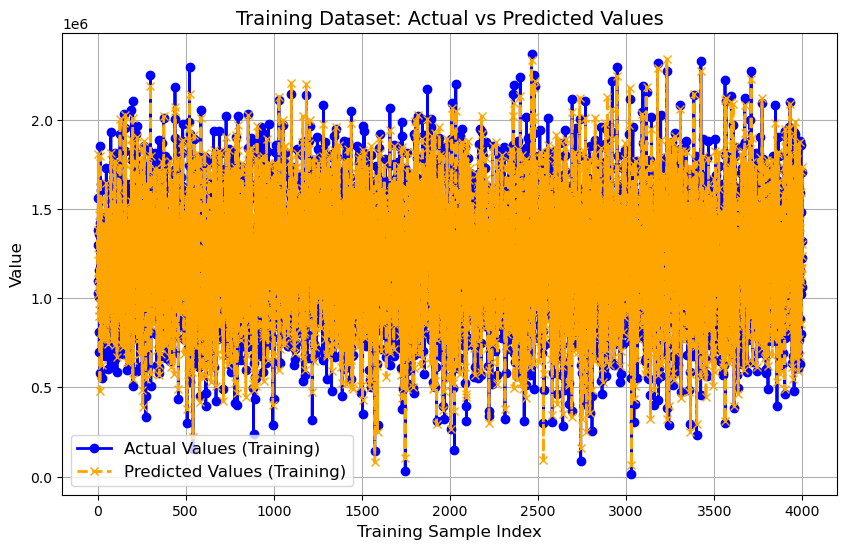

In [56]:
Y_train = np.array(Y_train)  # True values for training set
train_predictions = model.predict(X_train)  # Predicted values for training set

# Plot actual vs predicted for the training set
plt.figure(figsize=(10, 6))
plt.plot(Y_train, label="Actual Values (Training)", marker='o', color="blue", linestyle='-', linewidth=2)
plt.plot(train_predictions, label="Predicted Values (Training)", marker='x', color="orange", linestyle='--', linewidth=2)

# Add title, labels, legend, and grid
plt.title("Training Dataset: Actual vs Predicted Values", fontsize=14)
plt.xlabel("Training Sample Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()